In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [31]:
base_model.trainable = False

In [33]:
x= base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
predictions = Dense(10,activation='softmax')(x) 

In [37]:
model = Model(base_model.input , outputs=predictions)

In [39]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
datagen = ImageDataGenerator(rescale=1.0/255 , validation_split=0.2,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)

In [57]:

data_dir="C:\\Users\payal\\OneDrive\\Desktop\\DL COdes\\raw-img"
train_gen = datagen.flow_from_directory(data_dir,target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\payal\AppData\Local\Temp\ipykernel_3872\355191994.py:1: SyntaxWarning: invalid escape sequence '\p'
  data_dir="C:\\Users\payal\\OneDrive\\Desktop\\DL COdes\\raw-img"


Found 20995 images belonging to 10 classes.


In [59]:
validation_gen = datagen.flow_from_directory(data_dir,target_size=(224,224),batch_size=32,class_mode="categorical",subset='validation')

Found 5244 images belonging to 10 classes.


In [61]:
history = model.fit(train_gen,validation_data=validation_gen,epochs=5)

C:\Users\payal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8797 - loss: 0.4022

C:\Users\payal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 1474s 2s/step - accuracy: 0.8798 - loss: 0.4020 - val_accuracy: 0.9407 - val_loss: 0.1887
Epoch 2/5
286/657 ━━━━━━━━━━━━━━━━━━━━ 7:02 1s/step - accuracy: 0.9470 - loss: 0.1676

KeyboardInterrupt: 

In [62]:
test_loss,test_acc = model.evaluate(validation_gen)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_acc)

164/164 ━━━━━━━━━━━━━━━━━━━━ 150s 912ms/step - accuracy: 0.9499 - loss: 0.1588
Test Loss: 0.1791379153728485
Test Accuracy: 0.9450801014900208


In [64]:
x_val , y_val=next(validation_gen)
predictions = model.predict(x_val)
predicted_labels = np.argmax(predictions,axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


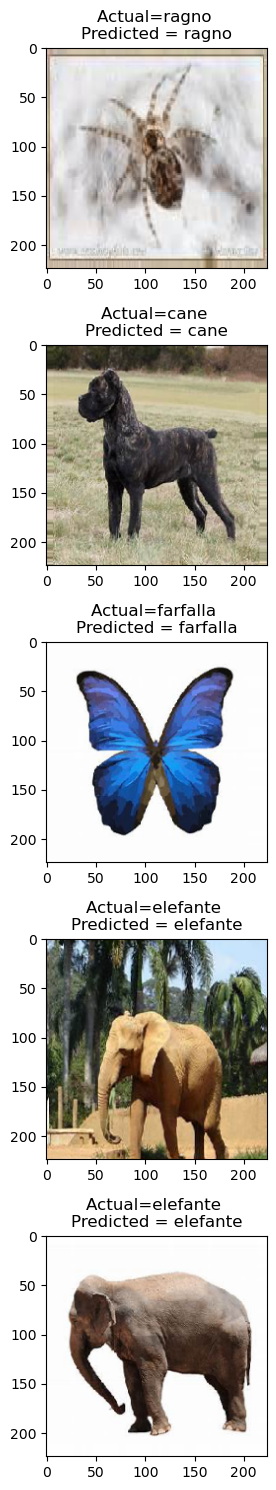

In [66]:
n=5
class_labels = list(train_gen.class_indices.keys())
plt.figure(figsize=(5,15))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.imshow(x_val[i])
    actual_label = class_labels[np.argmax(y_val[i])]
    predicted_label = class_labels[predicted_labels[i]]
    plt.title(f"Actual={actual_label} \nPredicted = {predicted_label}")
    plt.axis=('off')
plt.tight_layout()
plt.show()
    